In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers
import numpy as np

x = np.random.rand(4, 10, 10, 12)
y = layers.SeparableConv2D(filters=3, kernel_size=4, strides=3, padding='same', activation='relu')(x)
print(y.shape)


(4, 4, 4, 3)


In [ ]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_KerasLazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__cxx_version__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__internal__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_fi',
 '_initializers',
 '_inspect',
 '_kernel_dir',
 '_ll',
 '_losses',
 '_major_api_version',
 '_metrics',
 

In [ ]:
!pip install keras

In [ ]:
import keras

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import LeakyReLU,PReLU,ELU

In [ ]:
classifier=Sequential()

classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-10-5147f5580bb4>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
df=pd.read_csv('/content/Real_Combine.csv')


In [ ]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])


    num_params = model.count_params()
    if num_params > 1200:
        # When this error is raised, it skips the retries.
        raise keras_tuner.errors.FailedTrialError(
            f"Model too large! It contains {num_params} params."
        )

    return model





In [ ]:

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    directory='project',
    project_name='Air Quality Index',
    max_retries_per_trial=3,
    max_consecutive_failed_trials=8,)

Reloading Tuner from project/Air Quality Index/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_6

In [ ]:
'units_' + str(5)

'units_5'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 8 Complete [00h 00m 02s]

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 14m 59s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
17                |19                |num_layers
160               |448               |units_0
384               |224               |units_1
0.01              |0.001             |learning_rate
480               |128               |units_2
256               |192               |units_3
448               |288               |units_4
352               |96                |units_5
512               |288               |units_6
256               |288               |units_7
224               |384               |units_8
480               |128               |units_9
288               |416               |units_10
352               |64                |units_11
416               |512               |units_12
192               |352               |units_13
64                |512               |units_14
288               |

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_b

RuntimeError: Number of consecutive failures exceeded the limit of 8.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-34-17f68385673c>", line 17, in build_model
    num_params = model.count_params()
                 ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 1347, in count_params
    raise ValueError(
ValueError: You tried to call `count_params` on layer 'sequential', but the layer isn't built. You can build it manually via: `layer.build(input_shape)`.


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling (1).csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Perform Hyperparameter Optimization

# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid


In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
# !pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor


model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

# grid_result = grid.fit(X_train, y_train)

# [grid_result.best_score_,grid_result.best_params_]

In [ ]:
# !!pip install scikit-learn==1.5.2

# model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [ ]:
 # !pip install scikit-learn==1.2.2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,array_to_img, img_to_array, load_img



In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/pexels-pixabay-45201.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cat', save_format='jpg'):
              i += 1
              if i > 20:
                    break  # otherwise the generator would loop indefinitely

In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-14-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# !pip install -U keras-tuner

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 2 Complete [00h 15m 17s]
val_accuracy: 0.9051666855812073

Best val_accuracy So Far: 0.9051666855812073
Total elapsed time: 00h 29m 08s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
112               |128               |conv_1_filter
3                 |5                 |conv_1_kernel
64                |32                |conv_2_filter
5                 |3                 |conv_2_kernel
128               |64                |dense_1_units
0.001             |0.001             |learning_rate

Epoch 1/3
1392/1688 ━━━━━━━━━━━━━━━━━━━━ 2:21 478ms/step - accuracy: 0.8031 - loss: 0.5555

KeyboardInterrupt: 

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,array_to_img, img_to_array, load_img


In [ ]:
IMAGE_SIZE = [224, 224]
IMAGE_SIZE + [3]

[224, 224, 3]

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



  # useful for getting number of classes
folders = glob('Datasets/Train/*')


# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model


In [ ]:
model.save('facefeatures_new_model.h5')

In [ ]:
# dir(glob)

In [ ]:
import torch

In [ ]:
x = torch.rand(5, 3)
print(x)


tensor([[0.6806, 0.5630, 0.3891],
        [0.6602, 0.4593, 0.4878],
        [0.0942, 0.1049, 0.7534],
        [0.9076, 0.2538, 0.7078],
        [0.3279, 0.4699, 0.5704]])


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
# !pip install torch torchvision torchaudio


In [ ]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.cuda.is_available())  # Check if CUDA is enabled
# print(torch.cuda.get_device_name(0))

2.5.1+cu124
False


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# from keras.preprocessing.text import one_hot

In [ ]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [ ]:

### Vocabulary size
voc_size=10000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in sent]
print(onehot_repr)

[[2134, 2177, 1267, 248], [2134, 2177, 1267, 7023], [2134, 5956, 1267, 891], [9294, 5622, 7202, 9164, 7930], [9294, 5622, 7202, 9164, 4816], [4648, 2134, 7444, 1267, 1389], [4927, 1698, 1944, 9164]]


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 2134 2177 1267  248]
 [   0    0    0    0 2134 2177 1267 7023]
 [   0    0    0    0 2134 5956 1267  891]
 [   0    0    0 9294 5622 7202 9164 7930]
 [   0    0    0 9294 5622 7202 9164 4816]
 [   0    0    0 4648 2134 7444 1267 1389]
 [   0    0    0    0 4927 1698 1944 9164]]


In [ ]:
dim=10

In [ ]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.predict(embedded_docs)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[ 0.01783696 -0.00688499  0.03686328 -0.03660117  0.0080467  -0.02999054
  -0.00710456 -0.03533943 -0.01923835 -0.02860349]
 [ 0.01783696 -0.00688499  0.03686328 -0.03660117  0.0080467  -0.02999054
  -0.00710456 -0.03533943 -0.01923835 -0.02860349]
 [ 0.01783696 -0.00688499  0.03686328 -0.03660117  0.0080467  -0.02999054
  -0.00710456 -0.03533943 -0.01923835 -0.02860349]
 [ 0.01783696 -0.00688499  0.03686328 -0.03660117  0.0080467  -0.02999054
  -0.00710456 -0.03533943 -0.01923835 -0.02860349]
 [ 0.01997285 -0.01600888 -0.01821301  0.0145147  -0.00251856  0.0283834
  -0.02933165 -0.00106671 -0.04073812 -0.04558045]
 [ 0.00850014  0.04640893 -0.02075039 -0.02082607 -0.00886578  0.02327204
  -0.00860425  0.0191715  -0.03007987  0.04151204]
 [-0.03332777  0.00497798  0.00263917 -0.01367738  0.03554327 -0.00202183
   0.01893629 -0.02991098  0.02214967 -0.03521026]
 [ 0.02426881  0.00710449 -0.01133313 -0.02629033 -0.03879642 -0.0258569
  -0.03033258 -

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/fake_or_real_news.csv')

In [ ]:

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
###Drop Nan Values
df=df.dropna()

In [ ]:
## Get the Independent Features

X=df.drop('label',axis=1)


In [ ]:
## Get the Dependent features
y=df['label']

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
### Vocabulary size
voc_size=5000


In [ ]:

messages=X.copy()

In [ ]:

messages['title'][1]

'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'

In [ ]:
messages.reset_index(inplace=True)


In [ ]:

import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    # print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [ ]:

onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[3875, 4187, 4401],
 [2709, 1294, 733, 3108, 1177, 3330, 2697, 4563, 4303, 1658, 1774],
 [2729, 3580, 2499, 1381, 4433],
 [1060, 4981, 1050, 4220, 2016, 2579, 271, 276],
 [3174, 1497, 4295, 2264, 3196],
 [1633, 3242],
 [1854, 2946, 2709, 4765, 1688, 2787],
 [4116, 4876, 2955],
 [2908, 1468, 4303, 2545, 1439, 2647, 210],
 [236, 1675, 2701, 1497, 48, 2259, 563, 3771, 3615],
 [1325, 2545, 2620, 2655, 95, 2089, 4187, 2545, 3049],
 [2494, 4303, 4111, 160, 977, 2837, 4259, 1706, 3142, 3625],
 [4088, 4968, 4801, 4899, 1968, 393, 3243, 2138, 1774],
 [4842, 1504, 3282, 837, 4101],
 [4303, 3425, 3469, 662],
 [2206, 3594, 4468],
 [2654, 3237, 3140, 4187, 4869, 4322, 4691, 924, 2770],
 [4187, 2545, 4009, 4606, 1504, 3250, 3722, 514, 4085, 1164, 25, 4144, 3243],
 [236, 2981, 3140, 4349],
 [1444, 1523, 784, 2462, 2730, 2144, 1504],
 [855, 1158, 4303, 3641, 592, 4813],
 [3735, 1226, 4422, 4761, 3141, 2663, 4178, 4109, 4867],
 [4187, 2545, 2701, 3395, 2949, 4455, 2756],
 [1497, 1394, 4247, 1561, 2409

In [ ]:

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3875 4187 4401]
 [   0    0    0 ... 4303 1658 1774]
 [   0    0    0 ... 2499 1381 4433]
 ...
 [   0    0    0 ...  112 2994 4559]
 [   0    0    0 ... 1238 3333  249]
 [   0    0    0 ... 4595 4303 3196]]


In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
y_final

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_final = encoder.fit_transform(y_final)
# y_test = encoder.transform(y_test)
y_final

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5858 - loss: 0.6802 - val_accuracy: 0.7580 - val_loss: 0.5177
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8169 - loss: 0.4118 - val_accuracy: 0.7791 - val_loss: 0.4827
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8875 - loss: 0.2846 - val_accuracy: 0.7762 - val_loss: 0.5446
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9184 - loss: 0.2063 - val_accuracy: 0.7666 - val_loss: 0.6065
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9411 - loss: 0.1609 - val_accuracy: 0.7628 - val_loss: 0.7238
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9578 - loss: 0.1221 - val_accuracy: 0.7551 - val_loss: 0.9102
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9680 - loss: 0.0879 - val_accuracy: 0.7523 - val_loss: 1.0455
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9724 - loss: 0.0791 - val_accuracy: 0.7489 - v

In [ ]:
X_final.shape,y_final.shape

((6335, 20), (6335,))

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [ ]:
# !pip install --upgrade tensorflow


In [ ]:

from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
y_pred=model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype("int32")


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)


array([[501, 570],
       [472, 548]])

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5016738402678145

In [ ]:

### Data Collection
import pandas_datareader as pdr
key=""




import pandas as pd

In [ ]:

df=pd.read_csv('/content/AAPL (1).csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:

df1=df.reset_index()['close']

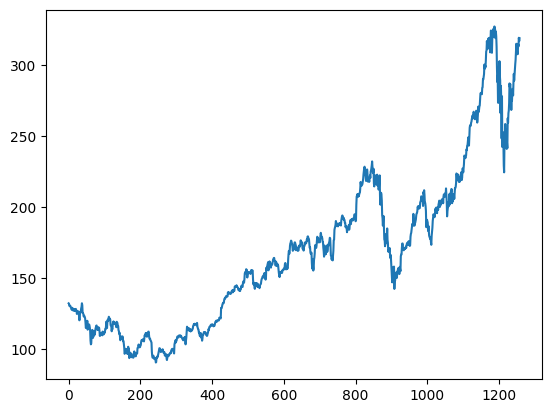

In [ ]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - loss: 0.0368 - val_loss: 0.0663
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 9.9436e-04 - val_loss: 0.0068
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 7.8715e-04 - val_loss: 0.0086
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - loss: 7.1660e-04 - val_loss: 0.0052
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 6.5112e-04 - val_loss: 0.0046
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 6.5668e-04 - val_loss: 0.0051
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 5.8566e-04 - val_loss: 0.0041
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - loss: 5.1891e-04 - val_loss: 0.0039
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - loss: 6.2316e-04 - val_loss: 0.0042
Epoch 12

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.12716613664236

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

239.6531514238632

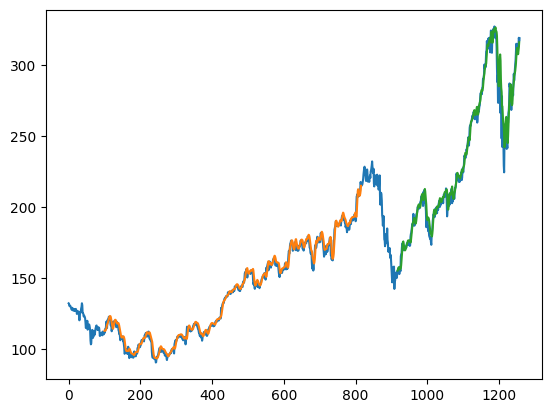

In [ ]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# len(train_predict)

716

In [ ]:
100:816

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

AttributeError: 'list' object has no attribute 'ndim'

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.96739787]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

IndexError: list index out of range

In [ ]:
x.shape

(0,)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

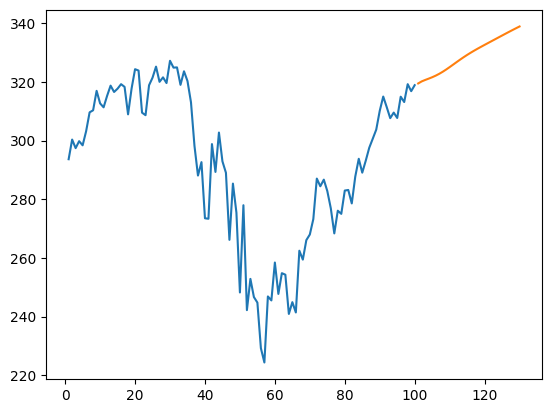

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

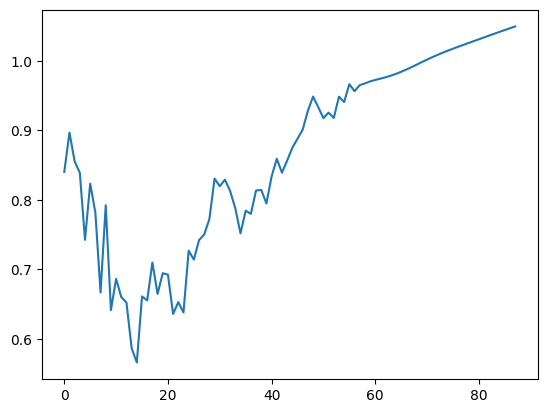

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

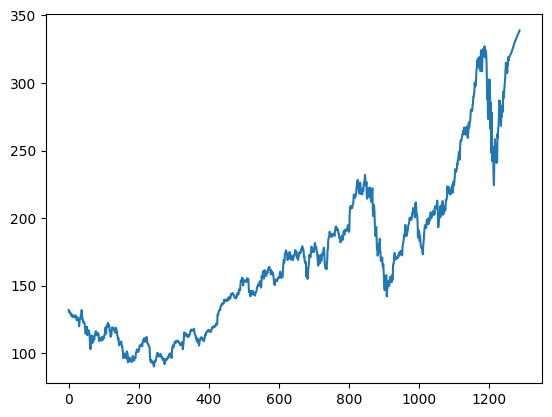

In [ ]:
plt.plot(df3)

In [ ]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [ ]:
df=pd.read_excel('/content/data.xlsx')

In [ ]:
df.head()

,Day,Date,Euro
0,Saturday,2023-12-30 23:00:00,43.23
1,Saturday,2023-12-30 22:00:00,50.10
2,Saturday,2023-12-30 21:00:00,39.78
3,Saturday,2023-12-30 20:00:00,62.01
4,Saturday,2023-12-30 19:00:00,71.09


In [ ]:
str(df['Date'][0]).split()[0]

'2023-12-30'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# Import Data -  Australian Drug Sales
DrugSalesData = pd.read_csv('/content/TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
DrugSalesData.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


In [ ]:
DrugSalesData.reset_index(inplace=True)

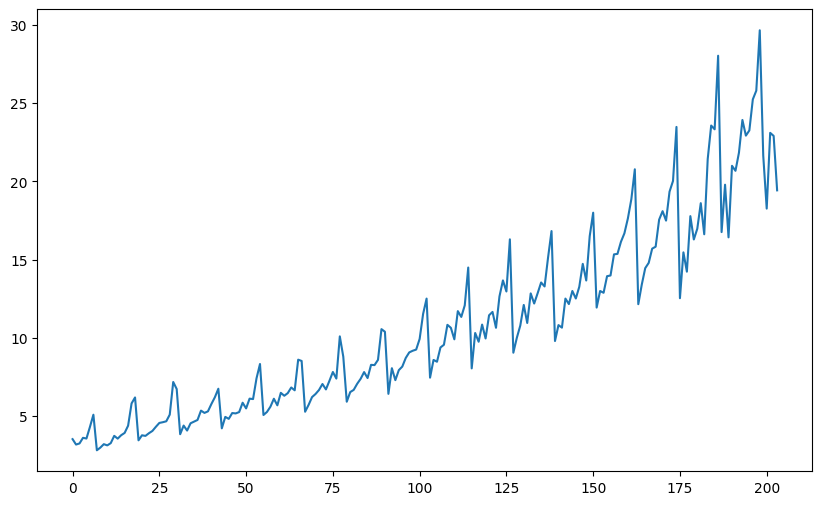

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [ ]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(DrugSalesData['Value'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['Value'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

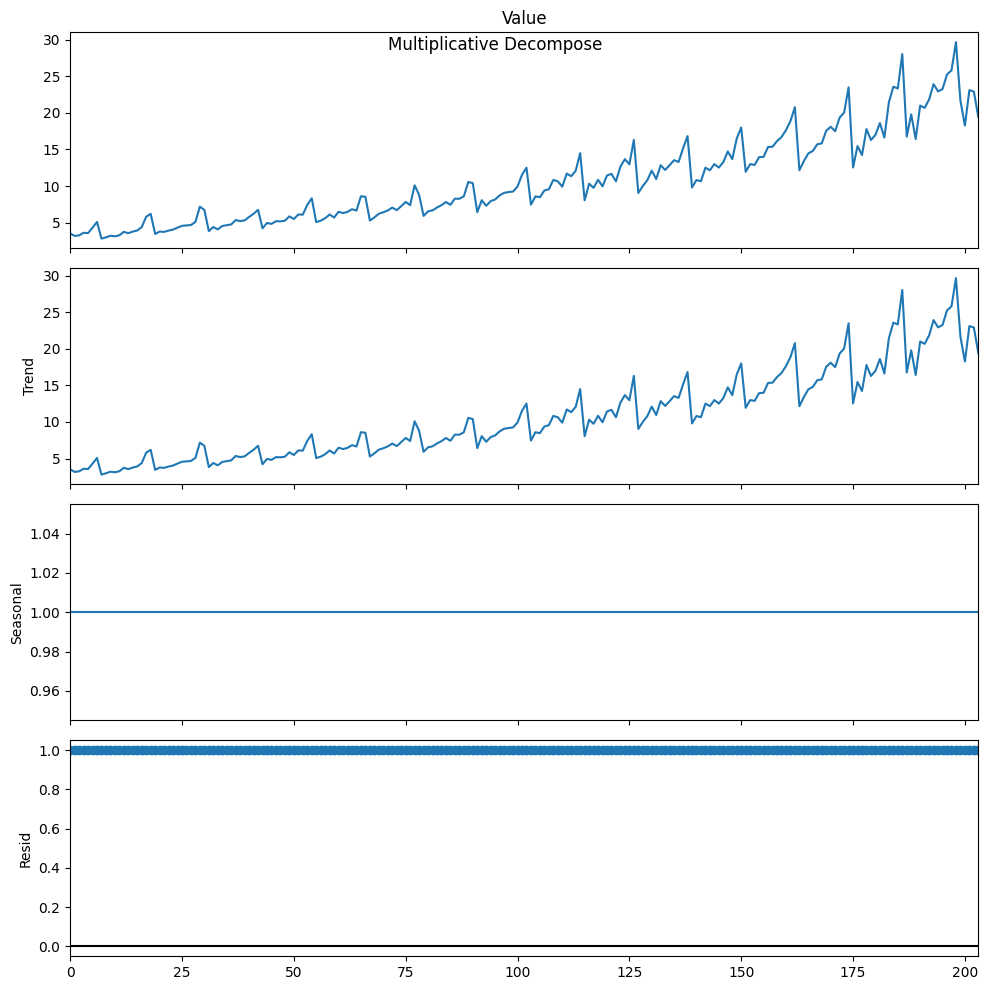

In [ ]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

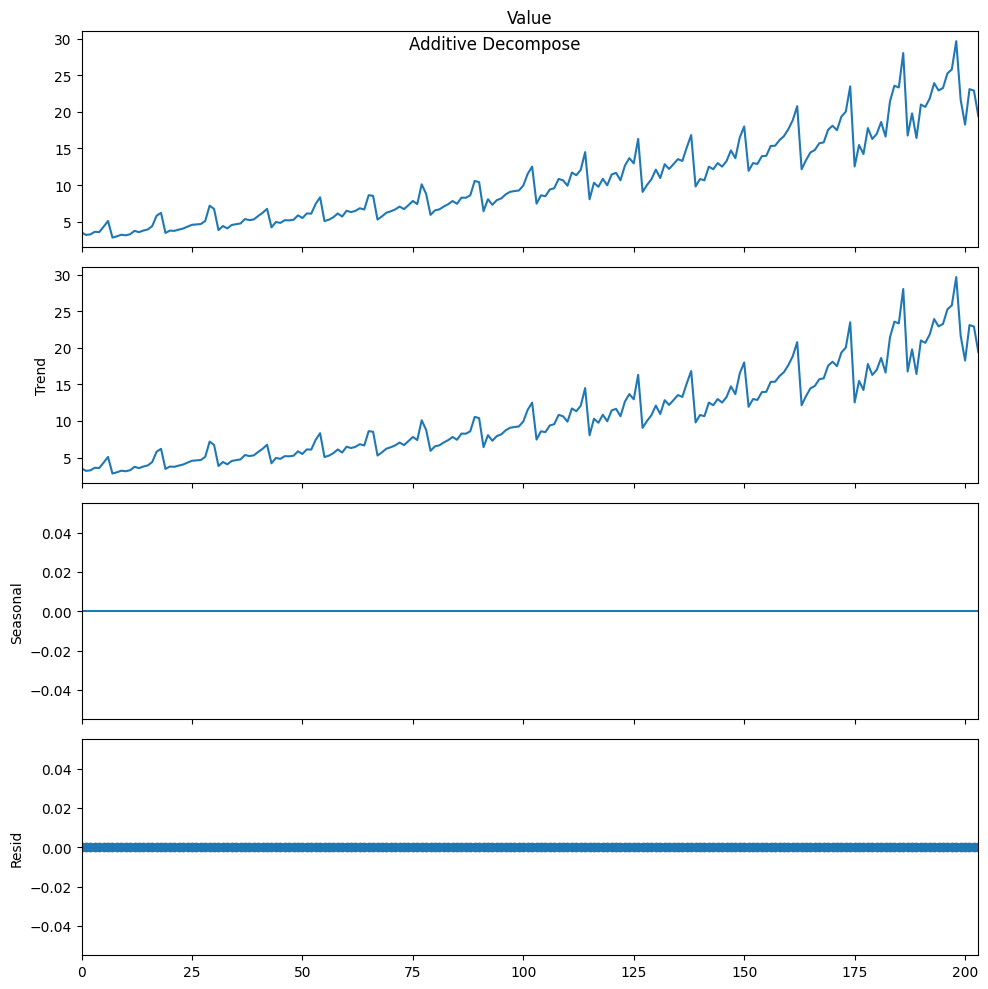

In [ ]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [ ]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [ ]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(DrugSalesData.Value.values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930673
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [ ]:
# !pip install tensorflow-object-detection-api

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
axisline = np.linspace(0, 10, 500)


#normal distributed values
normalnumbers = np.random.normal(0,5,500)

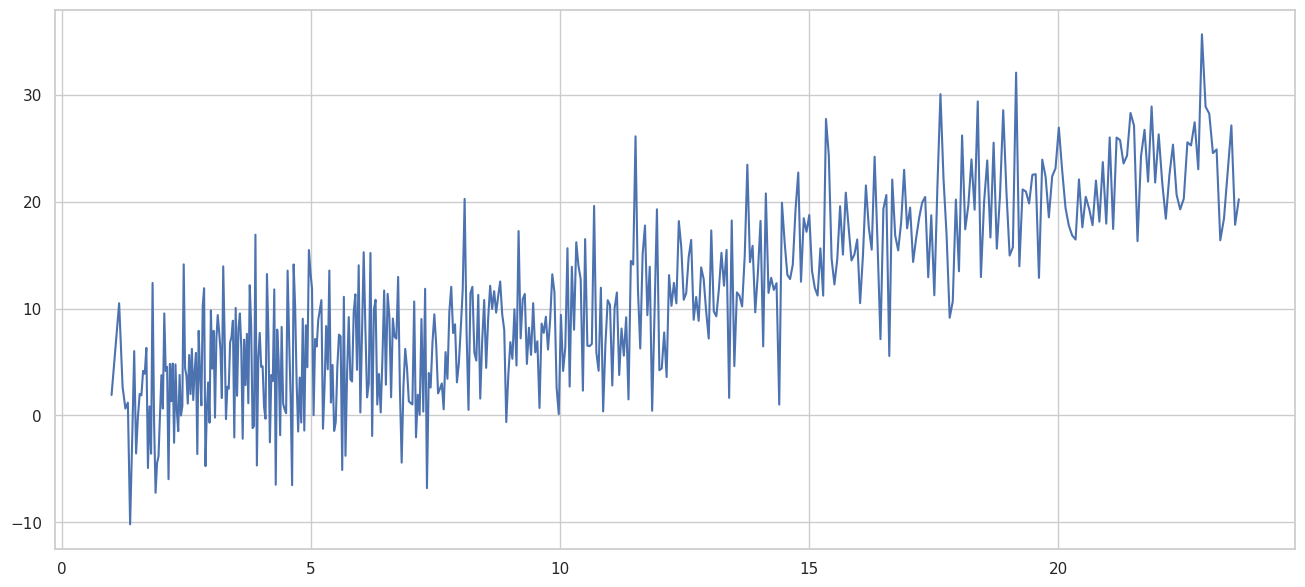

In [ ]:
#exponential series to get the trend
ExponentialData = np.exp(axisline**0.5)

#adding normally distributed series in exponential series
y = normalnumbers+ExponentialData

#plot
plt.figure(figsize=(16,7))
plt.plot(ExponentialData,y)

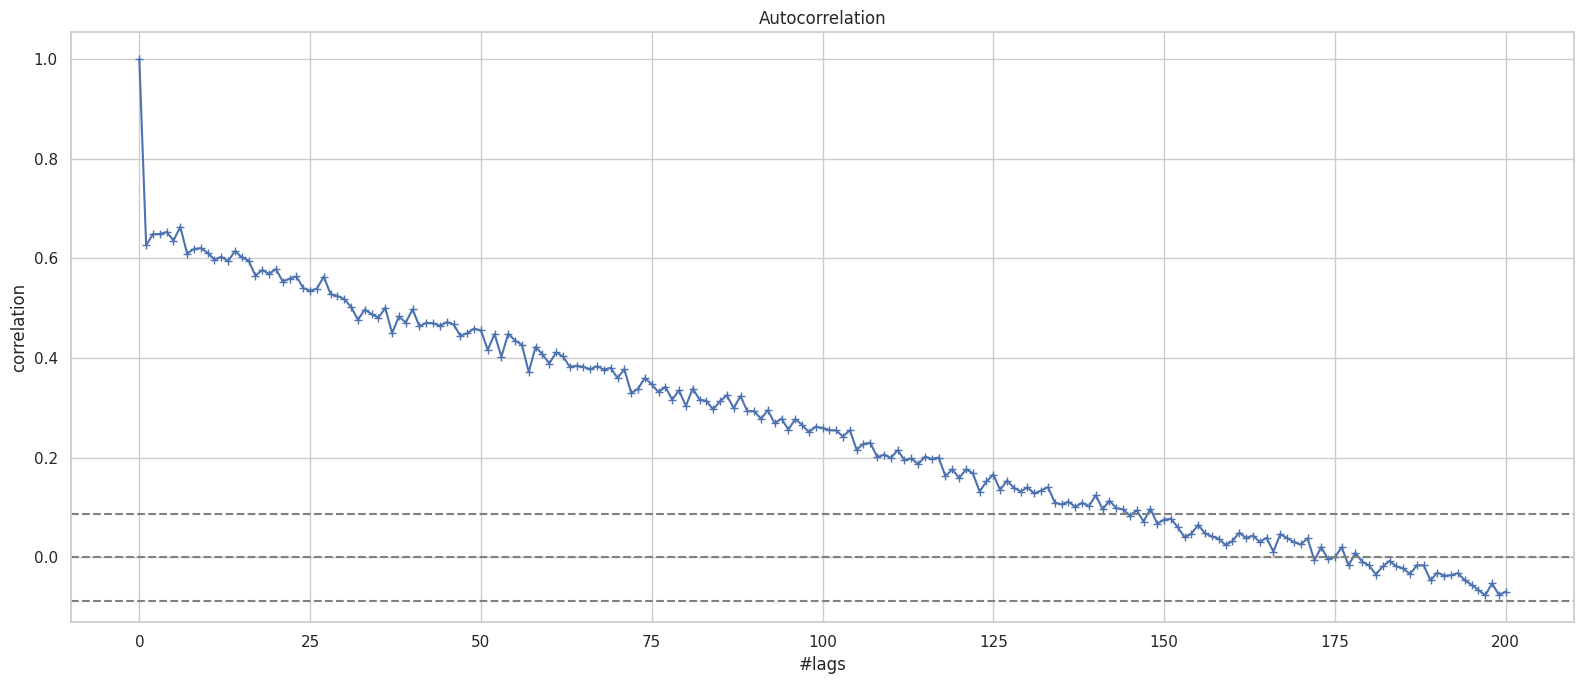

In [ ]:
#calling auto correlation function
ACF_lag= acf(y, nlags=200)



#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

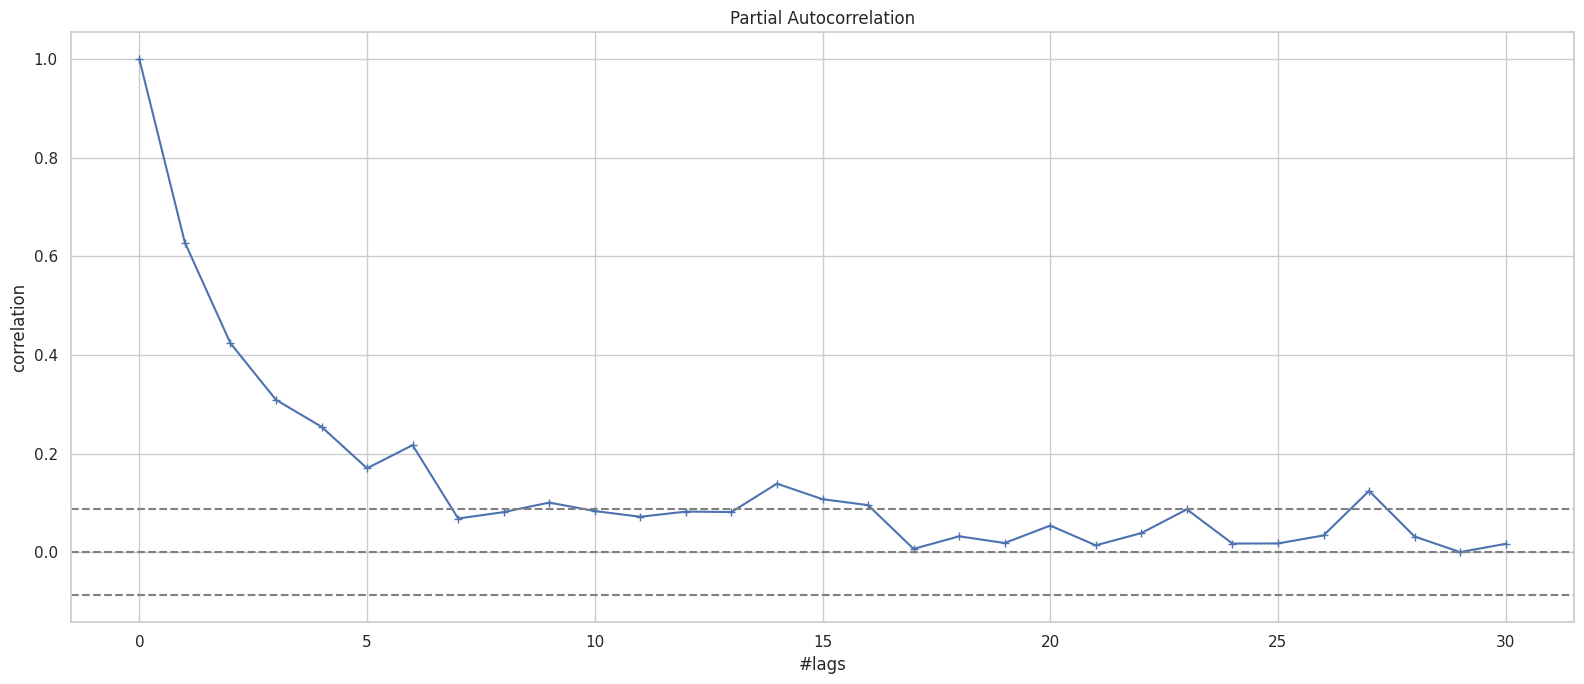

In [ ]:
#calling partial correlation function
PACF_lag = pacf(y, nlags=30, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

In [ ]:
# Auto Regression example - suitable for data without trend and seasonal component
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] #linear data

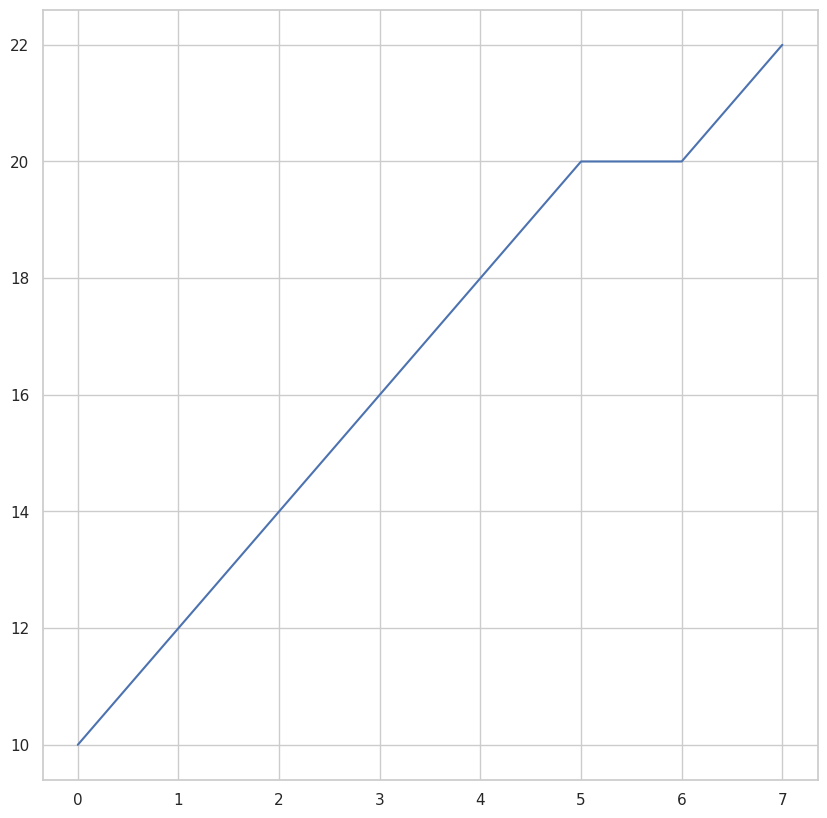

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
ARmodel = AutoReg(data, lags=1) #calling Auto regression model
ARmodel_fit = ARmodel.fit() #Fitting model

In [ ]:
ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [ ]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

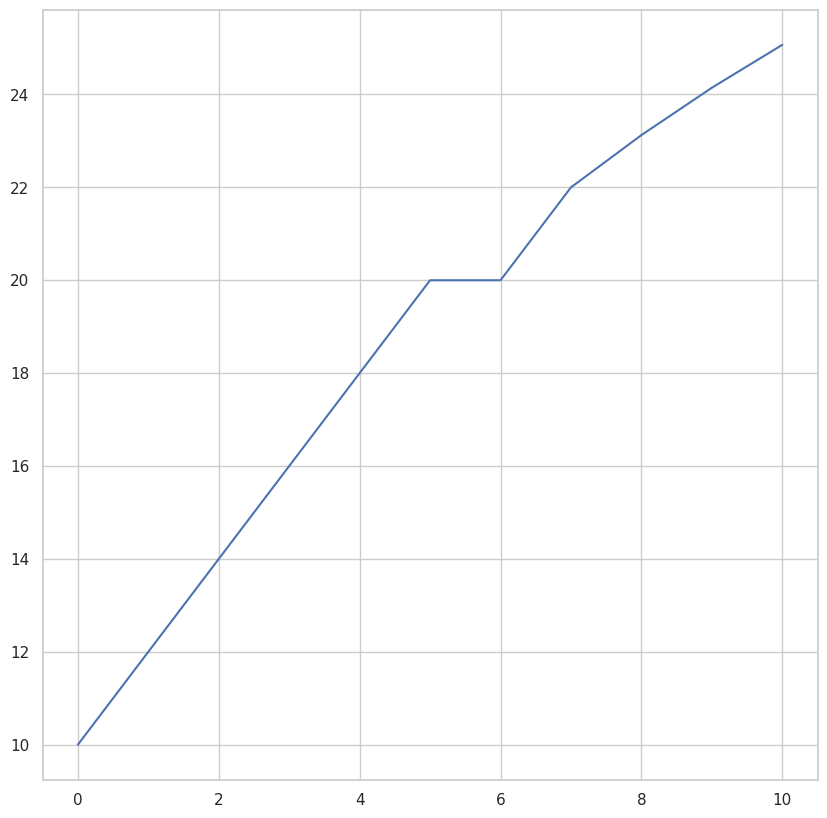

In [ ]:
plt.plot(combinedlist)

In [ ]:
from statsmodels.tsa.arima_model import ARMA #suitable for data without trend and seasonality

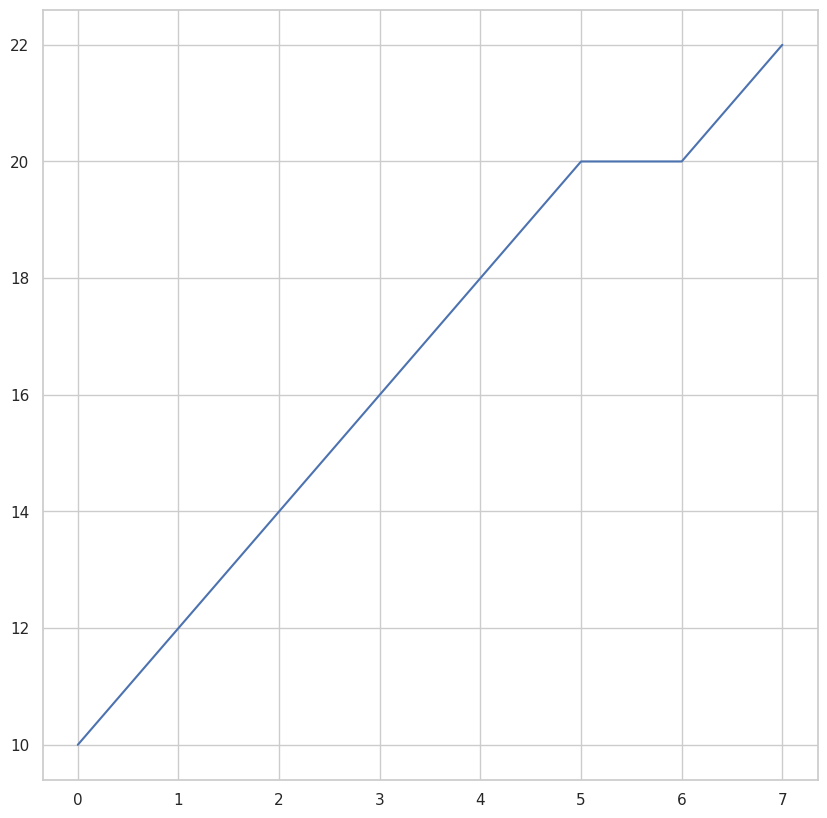

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
# fit model
# MAmodel = ARMA(data, order=(0, 1)) #model with AR=0 and MA=1
# MAmodel_fit = MAmodel.fit(disp=False)


model = SARIMAX(data, order=(0,0,1), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# !pip install --upgrade statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [ ]:
forecast = model_fit.forecast(steps=8)

In [ ]:
pred_list = forecast.tolist()
combinedlist = data+pred_list

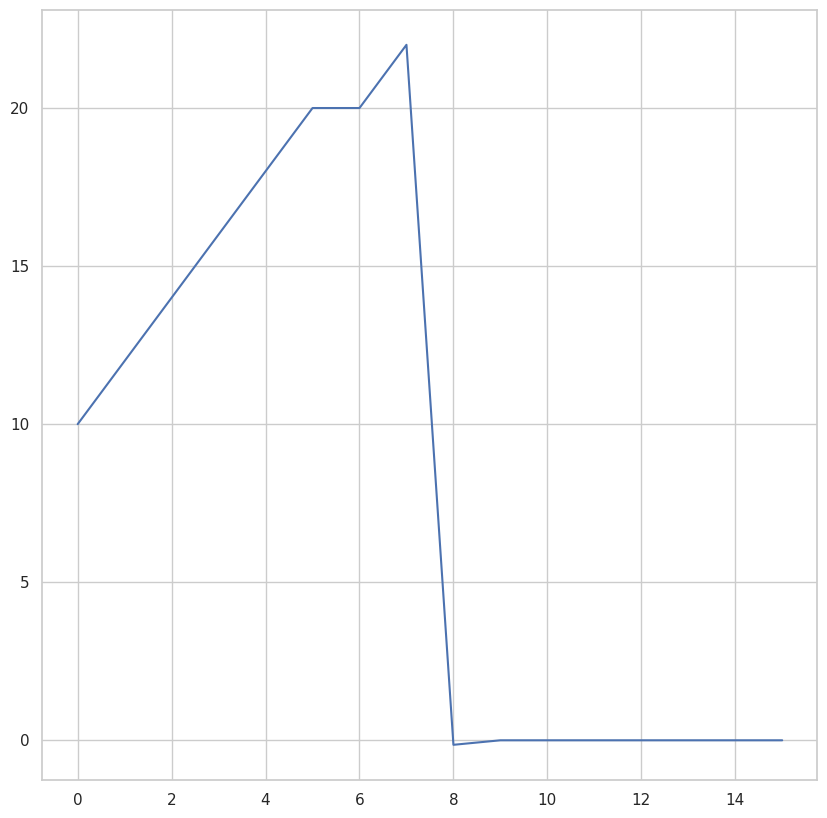

In [ ]:
plt.plot(combinedlist)

In [ ]:
#  Data -  Australian Drug Sales
import pandas as pd
DrugSalesData = pd.read_csv('/content/TimeSeries.csv', parse_dates=['Date'], index_col='Date')

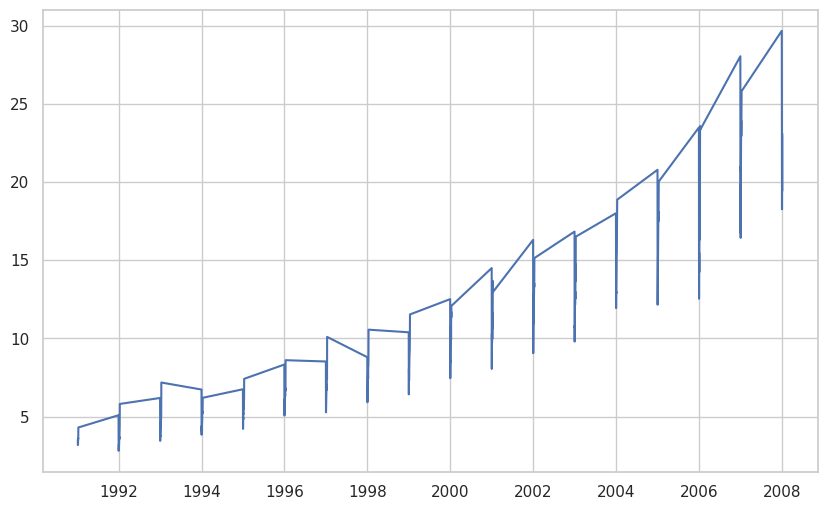

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [ ]:
# fit model
ARMAmodel = SARIMAX(DrugSalesData['Value'], order=(1,0, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# make prediction
ypredicted = ARmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+2)
print(ypredicted)

204    21.380187
205    21.351587
206    21.323025
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# fit model
ARIMAmodel = SARIMAX(DrugSalesData['Value'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

# make prediction
ypredicted = ARIMA_model_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, typ='levels')
print(ypredicted)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


204    21.203379
205    21.736449
206    21.896846
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
TempData = pd.read_csv('GlobalLandTemperaturesByCity.csv')
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
#Data Cleaning
TempData = TempData.dropna()
df_Denamrk = TempData[TempData.Country == "Denmark"]

df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)

df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df_Denamrk.describe()

,AverageTemperature
count,6332.000000
mean,7.695135
std,6.557923
min,-7.816000
25%,2.055000
50%,7.055000
75%,13.944000
max,20.883000


In [ ]:
ts = df_Denamrk['AverageTemperature']
ts

,AverageTemperature
dt,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082
...,...
2013-04-01,5.514
2013-05-01,12.770
2013-06-01,15.223


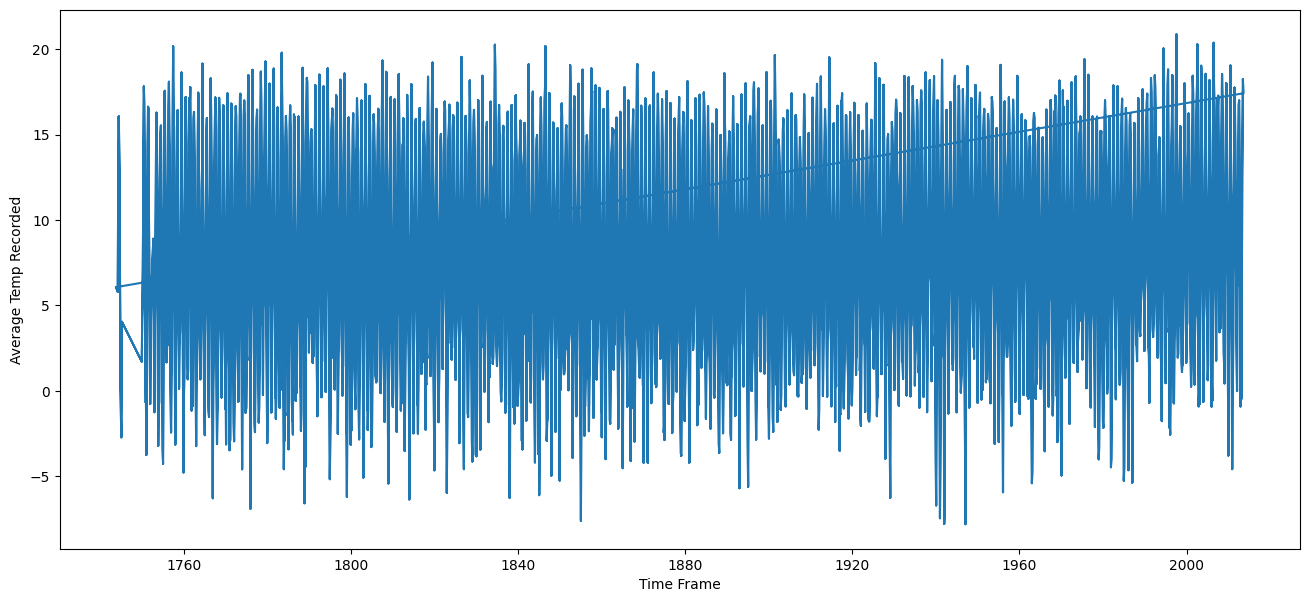

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.878337284067818
p-value: 3.8289557725808896e-17
Critial Values:
   1%, -3.4313889022895148
Critial Values:
   5%, -2.8619991032862404
Critial Values:
   10%, -2.567014377653714


In [ ]:
#First model
newmodel = SARIMAX(ts,order=(1,1,1))
results = newmodel.fit()

predictions = results.predict('01/01/1990', '01/01/1991')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [ ]:

# from pandas.tseries.offsets import DateOffset
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
# !pip install pandas-datareader    ---> remote data access, any many more

In [ ]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import datetime


In [ ]:
# pdr.get_data_yahoo('TSLA')

In [ ]:
# pdr.get_data_fred('GS10')

In [ ]:
df=pd.read_csv('/content/tesla.csv')


# df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'])
df = df.set_index('Date')

<ipython-input-5-9e28aff500a3>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


<Axes: xlabel='Date'>

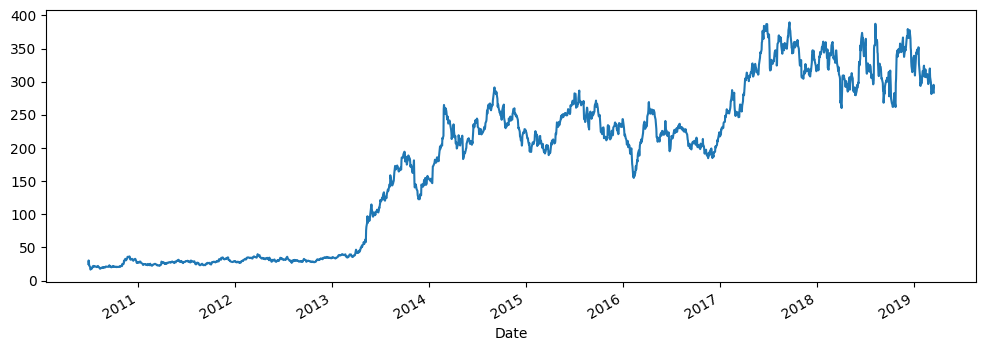

In [ ]:

df['High'].plot(figsize=(12,4))

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2019-03-15,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


/usr/local/lib/python3.11/dist-packages/matplotlib/axis.py:1822: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self._converter.convert(x, self.units, self)


<Axes: xlabel='Date'>

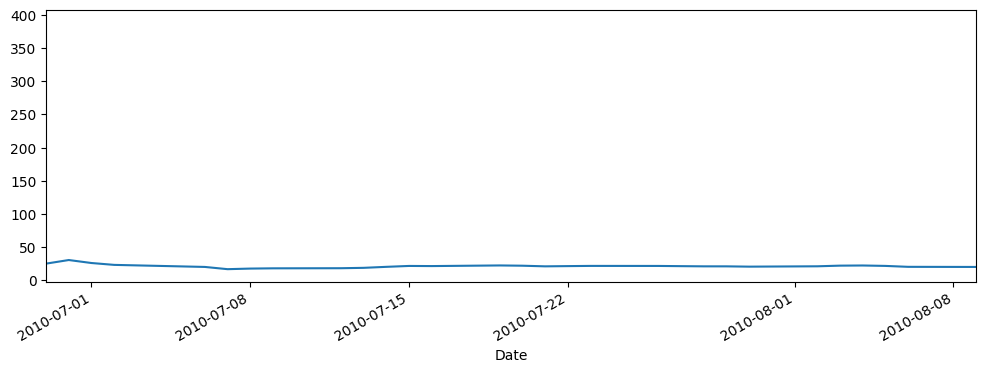

In [ ]:

## xlimit and y limit
df['High'].plot(xlim=['29-06-2010','08-09-2010'],figsize=(12,4))

<Axes: xlabel='Date'>

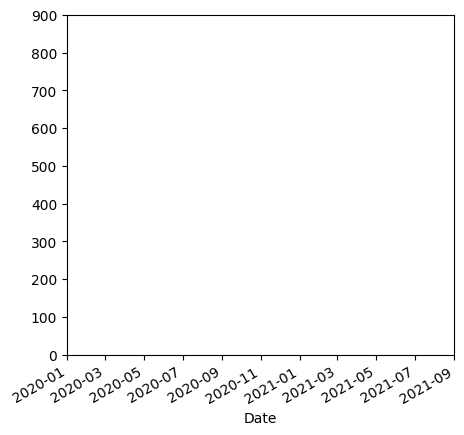

In [ ]:
## xlimit and y limit
df['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(5,5))

In [ ]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15'],
              dtype='datetime64[ns]', name='Date', length=2193, freq=None)

In [ ]:

index=df.loc['29-06-2010':'15-03-2019'].index

In [ ]:
index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15'],
              dtype='datetime64[ns]', name='Date', length=2193, freq=None)

In [ ]:
share_open=df.loc['29-06-2010':,'Open']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

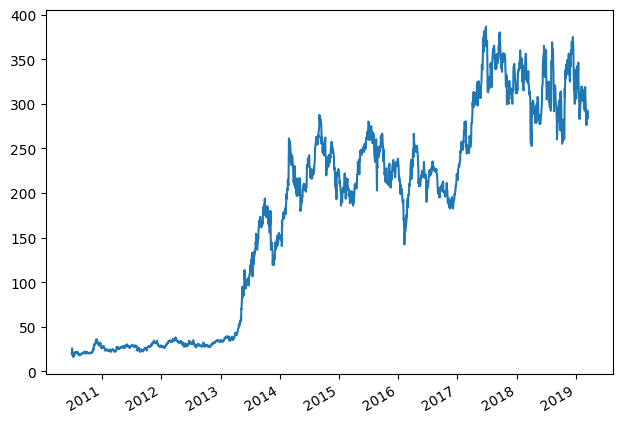

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [ ]:

df=df.reset_index()

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.1 KB


In [ ]:
## datetime
from datetime import datetime


In [ ]:

date=datetime(2021,11,21)

In [ ]:
datetime.now()

datetime.datetime(2025, 2, 9, 8, 4, 10, 589310)

In [ ]:
dir(date)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:

df.resample(rule='A').min()

<ipython-input-32-59f7e8fc3d74>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').min()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:

df.resample(rule='A').max()['Open'].plot()
# df.isnull().sum()

<ipython-input-25-91a59b41105d>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').max()['Open'].plot()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:

##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='QS').max()['High'].plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:

##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='BA').max()['Open'].plot()

<ipython-input-27-4834475e1c17>:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df.resample(rule='BA').max()['Open'].plot()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
df.resample(rule='BQS').max()['Open'].plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
##plotting
df['Open'].resample(rule='A').mean().plot(kind='bar')

<ipython-input-29-c65db71e646e>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Open'].resample(rule='A').mean().plot(kind='bar')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
# df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [ ]:
df['High'].rolling(11).max().head(20)

,High
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
df['Open:30 days rolling']=df['Open'].rolling(30).mean()

In [ ]:
df.head(31)

,Date,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,NaN
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,NaN
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,NaN
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,NaN
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,NaN
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,NaN


<Axes: >

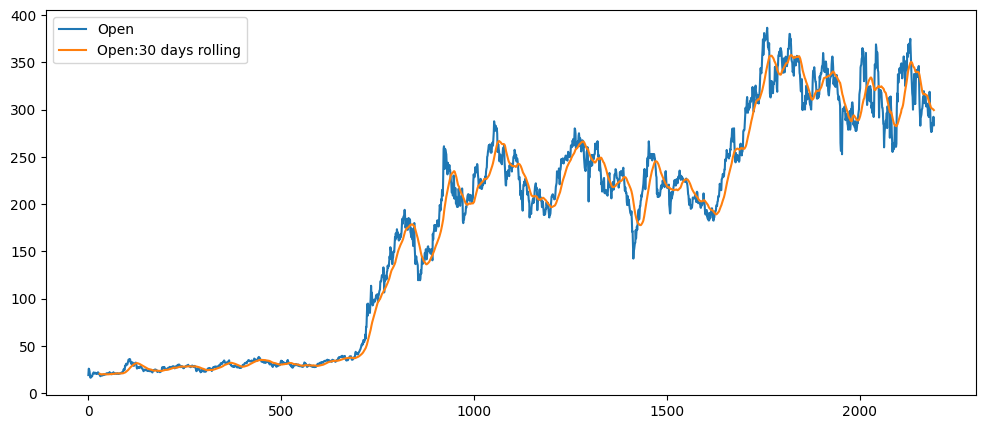

In [ ]:

df[['Open','Open:30 days rolling']].plot(figsize=(12,5))

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:

df_airline=pd.read_csv('/content/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df_airline.isnull().sum()


,0
Month,0
Thousands of Passengers,1


In [ ]:
df_airline.dropna(axis=0,inplace=True)

In [ ]:

df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [ ]:

df_airline.set_index('Month',inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_airline['Thousands of Passengers'])


ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)


In [ ]:
adf_test(df_airline['Passengers First Difference'].dropna())


ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)


In [ ]:
adf_test(df_airline['Passengers Second Difference'].dropna())


ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)


In [ ]:
adf_test(df_airline['Passengers 12 Difference'].dropna())


ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


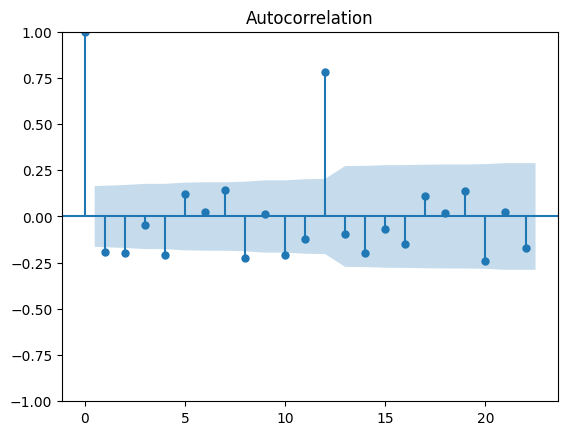

In [ ]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())


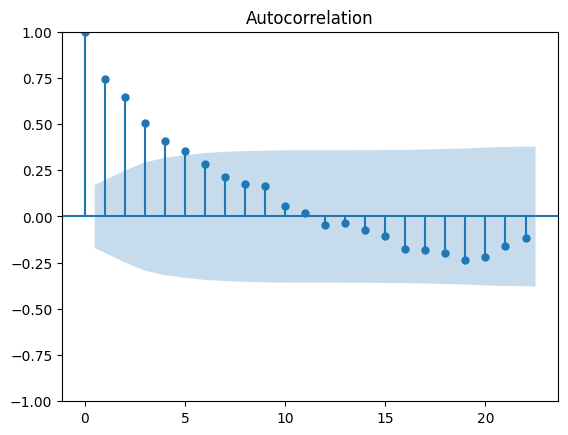

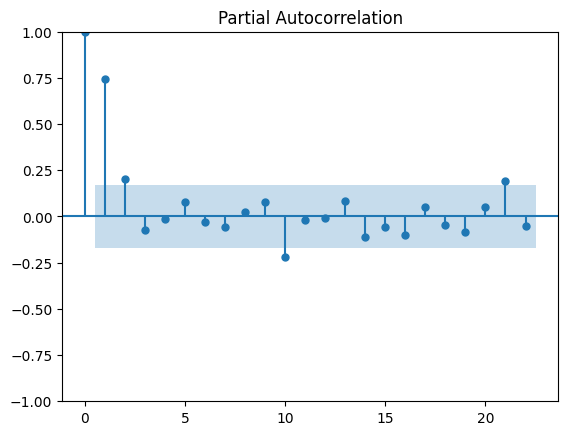

In [ ]:

acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

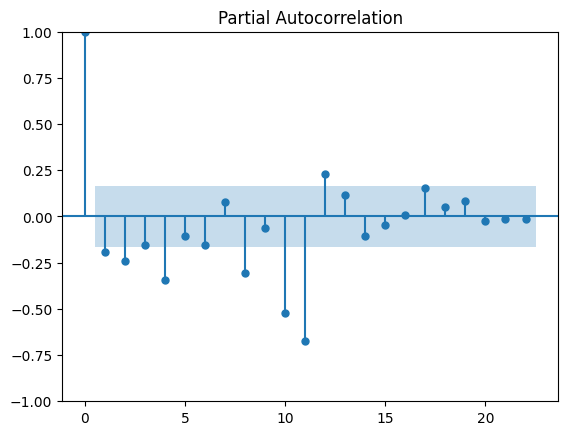

In [ ]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())


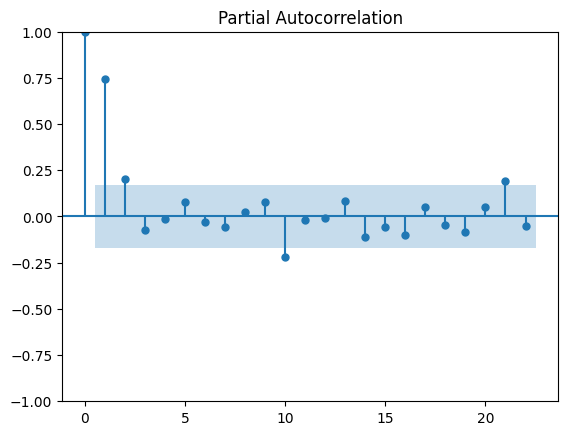

In [ ]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [ ]:

train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# model_SARIMAX=SARIMAX(train_data['Thousands of Passengers'],order=(10,2,0))
model_SARIMAX=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_Sarimax_fit=model_SARIMAX.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:

model_Sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Mon, 10 Feb 2025   AIC                            548.481
Time:                                     09:44:10   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: ylabel='Density'>

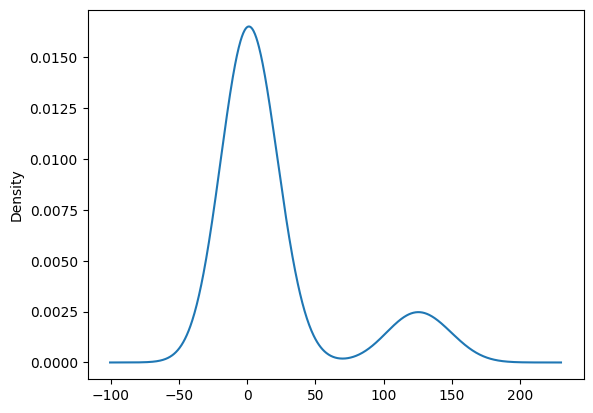

In [ ]:
model_Sarimax_fit.resid.plot(kind='kde')

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred=model_Sarimax_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

# pred_Sarima=model_SARIMAX_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
# residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: ylabel='Density'>

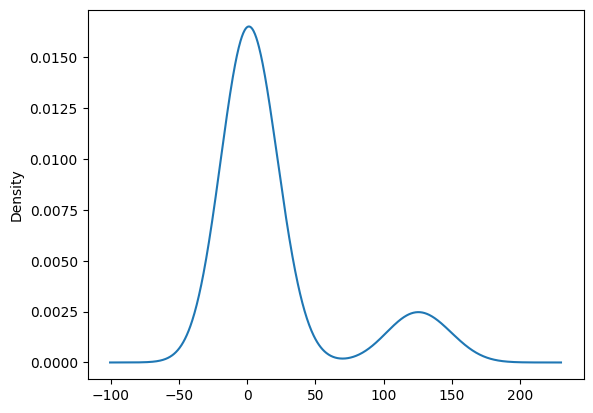

In [ ]:
model_Sarimax_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<ipython-input-79-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

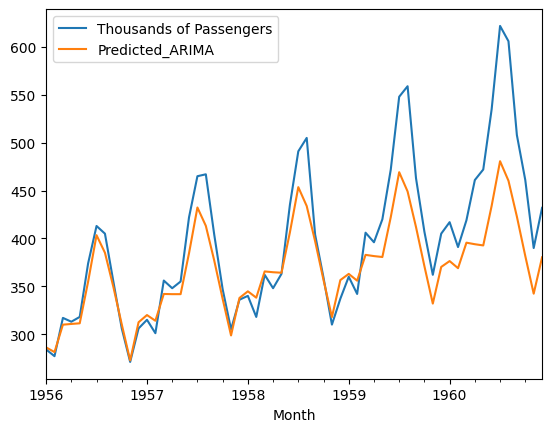

In [ ]:

test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()